In [1]:
import numpy as np
import sympy as sp
from scipy.optimize import brentq
import matplotlib.pyplot as plt
plot_params = {
    'text.latex.preamble' : r'\usepackage{amsmath}',
    'text.usetex'         : True,
    'font.family'         : 'sans-serif',
    'font.sans-serif'     : ['Helvetica']   
}
plt.rcParams.update(plot_params)
from matplotlib import cm

import pint
ureg = pint.UnitRegistry()
Q_ = ureg.Quantity

# Problem 1

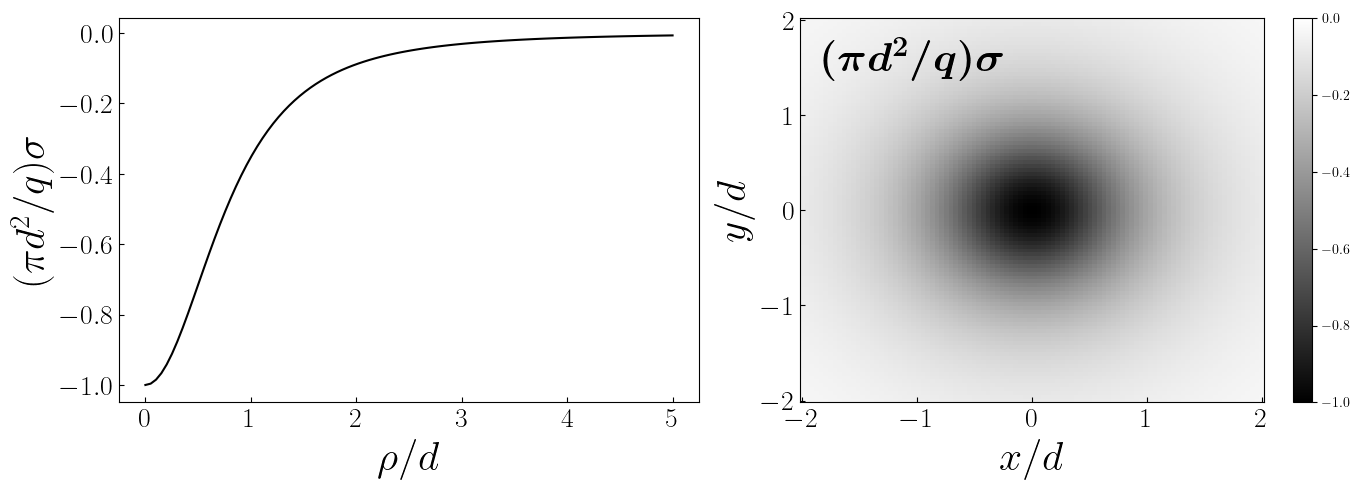

In [2]:
rho = np.linspace(0,5,100)
f   = -1/(rho**2 + 1)**(3/2)

nrows,ncols=1,2
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

ax[0].plot(rho,f,'k-')
ax[0].set_xlabel(r'$\rho/d$',size=30)
ax[0].set_ylabel(r'$(\pi d^2/q) \sigma$',size=30)
ax[0].tick_params(axis='both',which='major',direction='in',labelsize=20)


x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100) 
X,Y = np.meshgrid(x,y)
f   = -1/(X**2 + Y**2 + 1)**(3/2)

cs = ax[1].pcolormesh(X,Y,f,cmap=cm.gray,vmin=-1,vmax=0)
cs.set_clim(-1,0)
fig.colorbar(cs)
ax[1].set_xlabel(r'$x/d$',size=30)
ax[1].set_ylabel(r'$y/d$',size=30)
ax[1].text(x=0.05,y=0.95,s=r'\boldmath $(\pi d^2/q) \sigma$',size=30,va='top',ha='left',transform=ax[1].transAxes)
ax[1].tick_params(axis='both',which='major',direction='in',labelsize=20)

plt.tight_layout()
plt.show()
fig.savefig('prob1a.pdf',bbox_inches='tight')

In [3]:
d = Q_(1,'angstrom')
q = -Q_(1.602e-19,'C')
eps0 = Q_(8.854e-12,'F/m')
W = q**2/4/np.pi/eps0/2/d
W.to('eV')

7.1983880098899 <Unit('electron_volt')>

# Problem 3

In [14]:
f = lambda t,z: (2*t**2 - 1)/t/(t**2-1)**2 - z

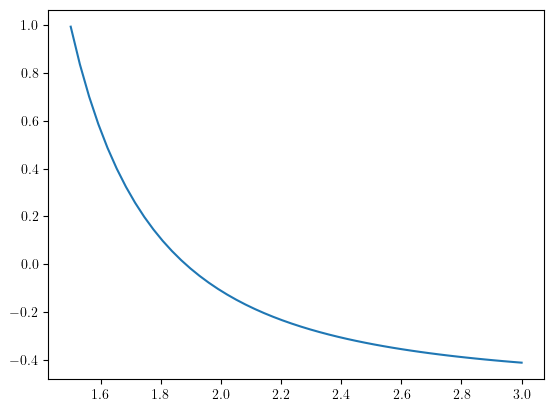

In [40]:
x = np.linspace(1.5,3)
plt.plot(x,f(x,0.5))
plt.show()

In [42]:
x = brentq(f,1.3,3,args=(0.5))
xi = x - 1
print(xi)

0.8822691457057279


In [32]:
xi = sp.symbols(r'\xi',real=True,positive=True)
expr = (2*(xi+1)**2 - 1)/(xi+1)/((xi+1)**2-1)**2
expr.series(xi,0,1)

1/(4*\xi**2) + 1/(2*\xi) - 13/16 + O(\xi)